In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df_eplResult = pd.read_csv(r'C:\Users\damar.DESKTOP-QQD2IM9\OneDrive\Desktop\results.csv',encoding='windows-1252')

In [7]:
print(df_eplResult)

        Season              DateTime     HomeTeam        AwayTeam  FTHG  FTAG  \
0      1993-94  1993-08-14T00:00:00Z      Arsenal        Coventry     0     3   
1      1993-94  1993-08-14T00:00:00Z  Aston Villa             QPR     4     1   
2      1993-94  1993-08-14T00:00:00Z      Chelsea       Blackburn     1     2   
3      1993-94  1993-08-14T00:00:00Z    Liverpool  Sheffield Weds     2     0   
4      1993-94  1993-08-14T00:00:00Z     Man City           Leeds     1     1   
...        ...                   ...          ...             ...   ...   ...   
11032  2021-22  2022-02-12T17:30:00Z      Norwich        Man City     0     4   
11033  2021-22  2022-02-13T14:00:00Z      Burnley       Liverpool     0     1   
11034  2021-22  2022-02-13T14:00:00Z    Newcastle     Aston Villa     1     0   
11035  2021-22  2022-02-13T14:00:00Z    Tottenham          Wolves     0     2   
11036  2021-22  2022-02-13T16:30:00Z    Leicester        West Ham     2     2   

      FTR  HTHG  HTAG  HTR 

In [8]:
df_eplResult.columns

Index(['Season', 'DateTime', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC',
       'HF', 'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [10]:
#descriptive statistics summary FTHG/ Full Time Home Goal
df_eplResult['FTHG'].describe()

count    11037.000000
mean         1.518891
std          1.301688
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: FTHG, dtype: float64

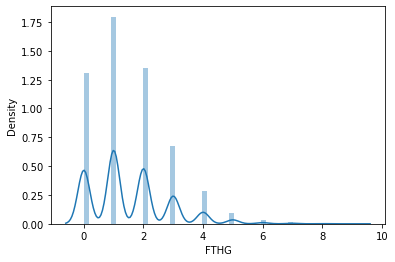

In [12]:
#histogram
sns.distplot(df_eplResult['FTHG']);

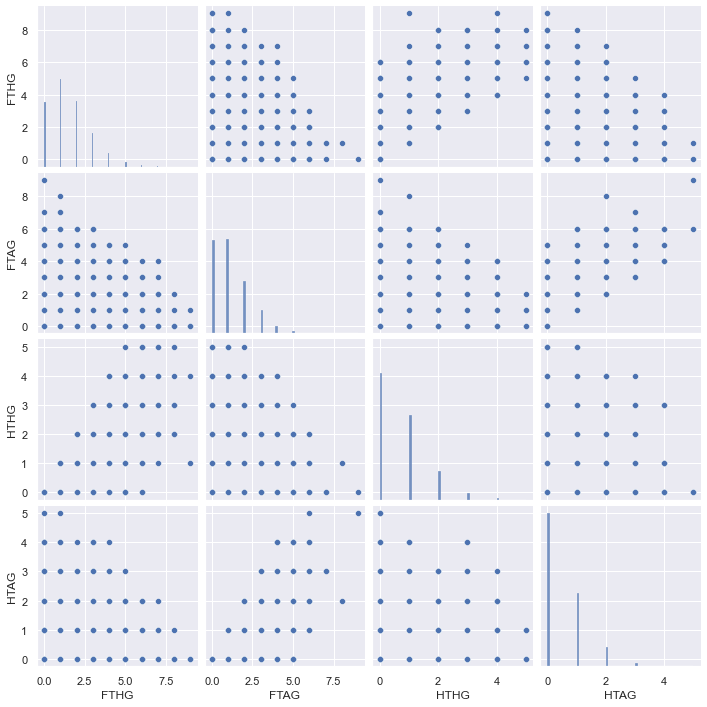

In [14]:
#scatterplot
sns.set()
cols = ['FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR']
sns.pairplot(df_eplResult[cols], size = 2.5)
plt.show();

In [16]:
#missing data
total = df_eplResult.isnull().sum().sort_values(ascending=False)
percent = (df_eplResult.isnull().sum() / df_eplResult.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
HS,2824,0.255867
AS,2824,0.255867
HR,2824,0.255867
AY,2824,0.255867
HY,2824,0.255867
AF,2824,0.255867
HF,2824,0.255867
AC,2824,0.255867
HC,2824,0.255867
AST,2824,0.255867


In [17]:
#dealing with missing data
df_eplResult = df_eplResult.drop((missing_data[missing_data['Total'] > 1]).index,1)

df_eplResult.isnull().sum().max() #just checking that there's no missing data missing...

0